In [139]:
import matplotlib.pyplot as plt


def plot_fid(name):
    with open(f"fid/scores/{name}.txt") as f:
        lines = f.readlines()

    fids = filter(lambda x: x.startswith("FID"), lines)
    fids = list(map(lambda x: float(x.split()[1]), fids))

    epochs = filter(lambda x: x.strip().isdigit(), lines)
    epochs = list(map(int, epochs))

    # Set size of plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, fids)
    plt.xlabel("Epoch")
    plt.ylabel("FID")
    plt.title("FID over Epoch")
    plt.show()


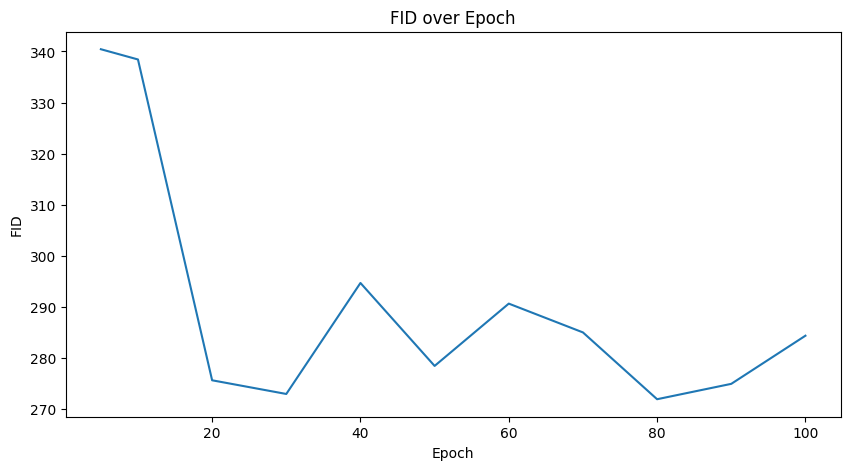

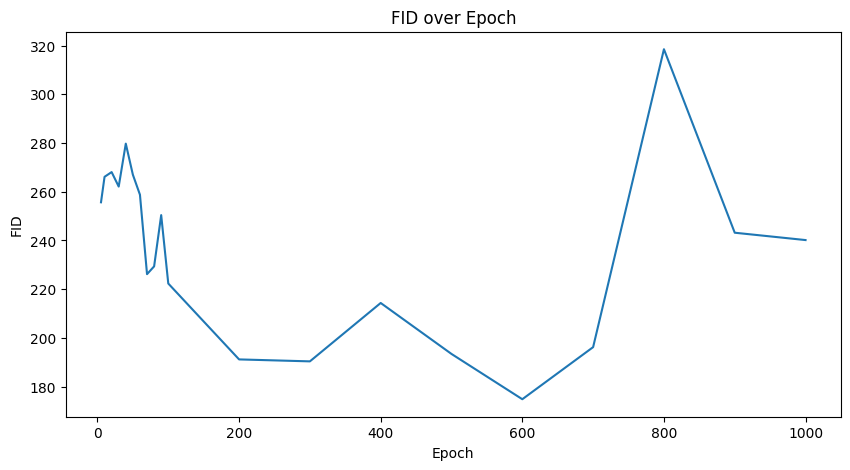

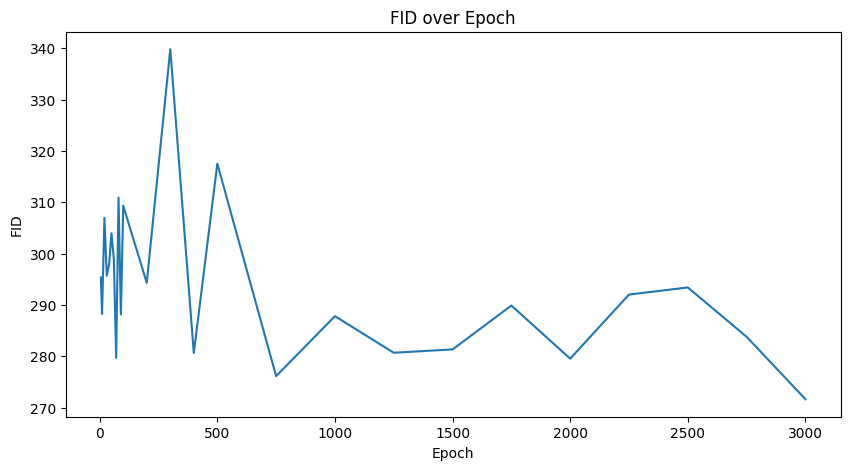

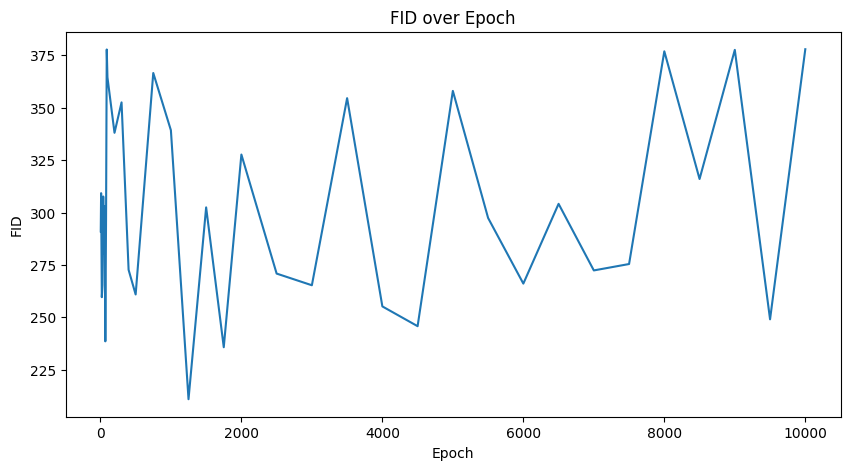

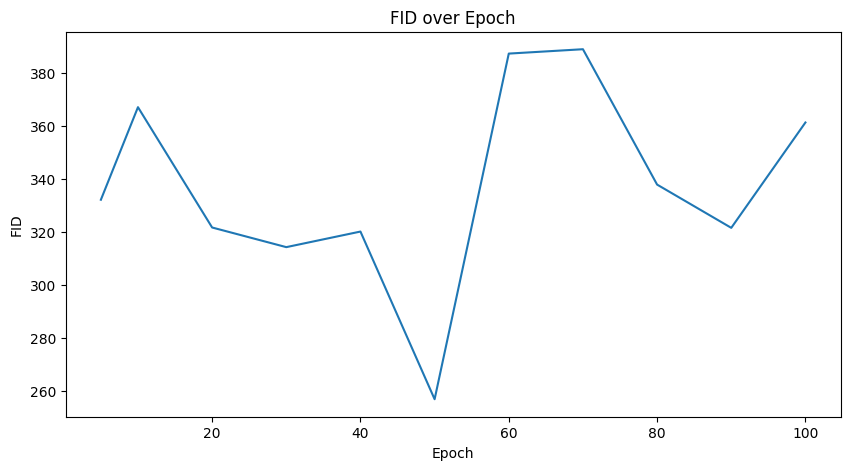

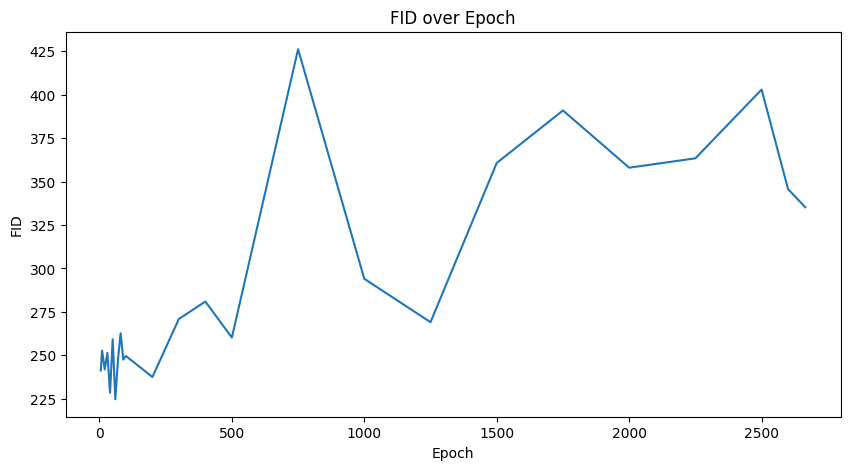

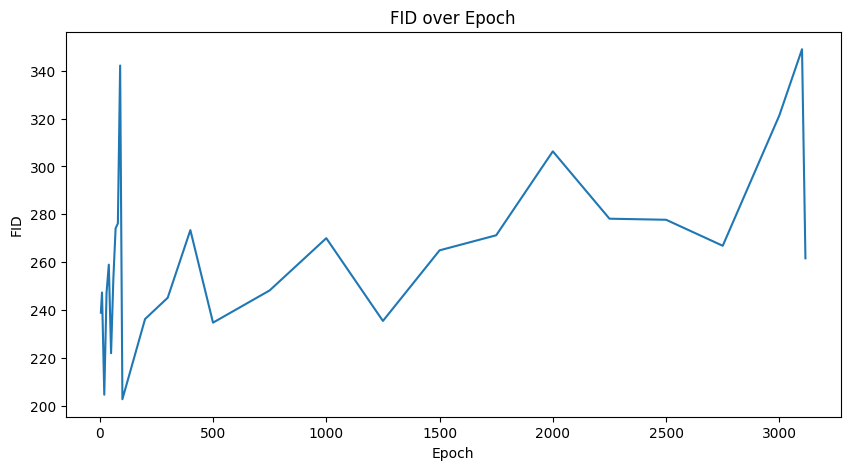

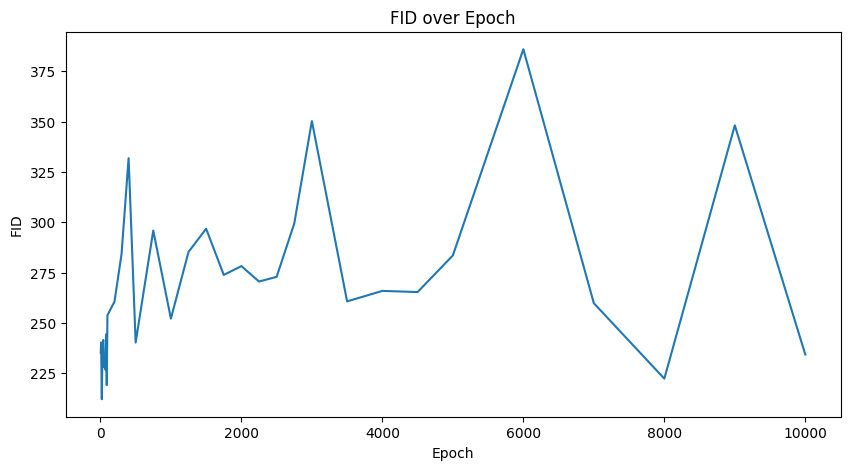

In [140]:
plot_fid("Base")
plot_fid("1_2")
plot_fid("1_3")
plot_fid("2_2k")
plot_fid("3")
plot_fid("4")
plot_fid("5")
plot_fid("6")

In [141]:
import re

def plot_loss(lossfile):
    with open(lossfile) as f:
        lines = f.readlines()
        # Remove all lines starting with "="
        lines = list(filter(lambda x: not x.startswith("="), lines))
        #(epoch: 1, iters: 400, time: 0.034, data: 0.254) D_A: -15.108 G_A: 19.988 cycle_A: 3.797 idt_A: 2.254 D_B: -20.046 G_B: 14.069 cycle_B: 5.215 idt_B: 1.928
        G_A = []
        D_B = []
        epoch = 1
        
        for line in lines:
            # For each epoch, get the G_A and D_B only once (there are multiple per epoch, just get the first one)
            if line.startswith(f"(epoch: {epoch},"):
                G_A.append((epoch, float(re.search(r"G_A: ([0-9.-]+)", line).group(1))))
                D_B.append((epoch, float(re.search(r"D_B: ([0-9.-]+)", line).group(1))))
                epoch += 1

    # Plot G_A and D_B loss on the same plot on a log scale
        plt.plot(*zip(*G_A), label="G_A2B")
        plt.plot(*zip(*D_B), label="D_B")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss over Epoch")
        plt.legend()
        plt.show()


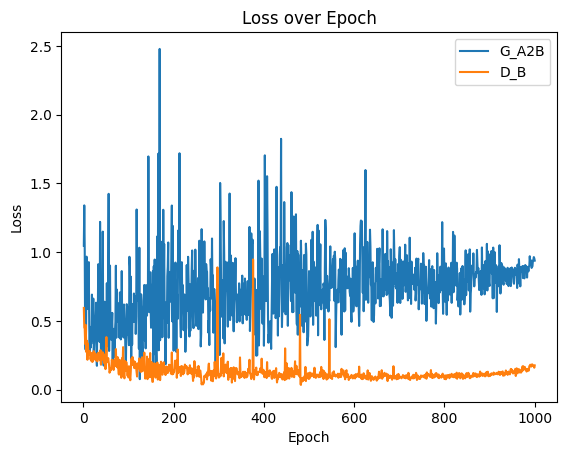

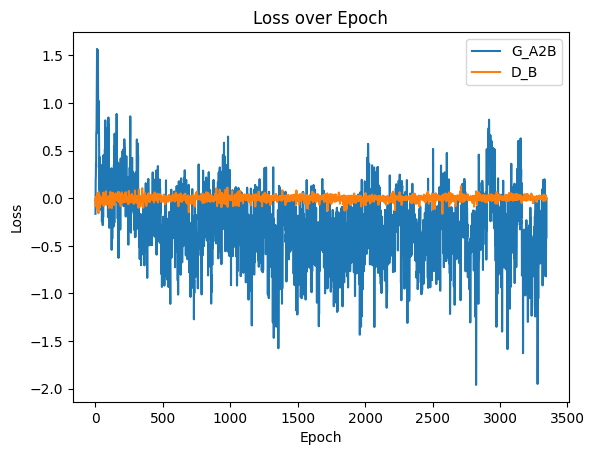

In [142]:
# plot_loss("loss/base.txt")
plot_loss("loss/1_2.txt")
plot_loss("loss/1_3.txt")
# plot_loss("loss/2.txt")
# plot_loss("loss/3.txt")
# plot_loss("loss/4.txt")
# plot_loss("loss/5.txt")
# plot_loss("loss/6.txt")
